In [3]:
import math as m
import numpy as np
import pylab as py
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [83]:
#-------------------------------------------------------------------
def desplazar_en_horizontal(x):
    delta_x = rd.randint(0,1)
    if (delta_x == 0):
        delta_x = -1
    if ((x + delta_x < 101) and (x + delta_x > 0)):
        x = x + delta_x
    return x
#-------------------------------------------------------------------
def desplazar_en_vertical(y):
    delta_y = rd.randint(0,1)
    if (delta_y == 0):
        delta_y = -1
    if ((y + delta_y < 101) and (y + delta_y > 0)):
        y = y + delta_y
    return y
#-------------------------------------------------------------------
def desplazar_en_vertical(y):
    delta_y = rd.randint(0,1)
    if (delta_y == 0):
        delta_y = -1
    if ((y + delta_y < 101) and (y + delta_y > 0)):
        y = y + delta_y
    return y
#-------------------------------------------------------------------
def desplazar(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][4] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
            if (poblacion[i][0] == 1):
                poblacion[i][3] = poblacion[i][3] - 1
                if (poblacion[i][3] == 0):
                    poblacion[i][4] = 0
    enfermarPoblacion(poblacion, tamanio)
#-------------------------------------------------------------------
def cumplenDistancia(ciudadano_1, ciudadano_2):
    distancia_1 = (ciudadano_1[1] - ciudadano_2[1])**2
    distancia_2 = (ciudadano_1[2] - ciudadano_2[2])**2
    if (m.sqrt(distancia_1 + distancia_2) < 2):
        return False
    else:
        return True
#-------------------------------------------------------------------
def enfermar(ciudadano):
    if rd.random() > 0.4:
        ciudadano[0] = 1
    return ciudadano
#-------------------------------------------------------------------
def inicializarCuentaRegresiva(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][3] = np.nan
        else:
            poblacion[i][3] = np.random.randint(10,20,1)
#-------------------------------------------------------------------
def setearCuentaRegresiva(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][3] = np.nan
        if (poblacion[i][0] == 1):
            if (m.isnan(poblacion[i][3]) == True):
                poblacion[i][3] = np.random.randint(10,20,1)
#-------------------------------------------------------------------
def enfermarPoblacion(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermar(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermar(poblacion[j])
    setearCuentaRegresiva(poblacion, tamanio)
#-------------------------------------------------------------------
def inicializarEnfermos(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (95):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][0] = 0
        
    inicializarCuentaRegresiva(poblacion, 100)
        
    return poblacion
#-------------------------------------------------------------------
def inicializarCaminantes(poblacion, tamanio):
    random_list = []
    array_len = len(poblacion)

    while len(random_list) < (50):
        random_int = rd.randint(0,array_len-1)
        if random_int not in random_list:
            random_list.insert(len(random_list), random_int)

    for position in random_list:
        poblacion[position][4] = 0
                
    return poblacion
#-------------------------------------------------------------------
def cantidadDeEnfermos(poblacion, tamanio):
    cantidad = 0
    for i in range(tamanio):
        if (poblacion[i][0] == 1):
            cantidad = cantidad + 1
    return cantidad
#-------------------------------------------------------------------
def cantidadDeSanos(poblacion, tamanio):
    cantidad = 0
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            cantidad = cantidad + 1
    return cantidad
#-------------------------------------------------------------------

## 10.a) Las personas enfermas no se curan nunca

In [84]:
(enfermo, coor_h, coor_v, time_remaining, se_mueve) = (np.ones(100),
                           np.random.uniform(0, 100, 100),
                           np.random.uniform(0, 100, 100),
                           np.zeros(100),
                           np.ones(100))
poblacion = np.asarray((enfermo, coor_h, coor_v, time_remaining, se_mueve)).T
poblacion = inicializarEnfermos(poblacion, 100)
poblacion = inicializarCaminantes(poblacion, 100)

In [85]:
(instante,enfermos,sanos) = ([],[],[])
for i in range(4000):
    desplazar(poblacion, 100)
    instante.insert(i, i)
    enfermos.insert(i, cantidadDeEnfermos(poblacion,100))
    sanos.insert(i, cantidadDeSanos(poblacion,100))

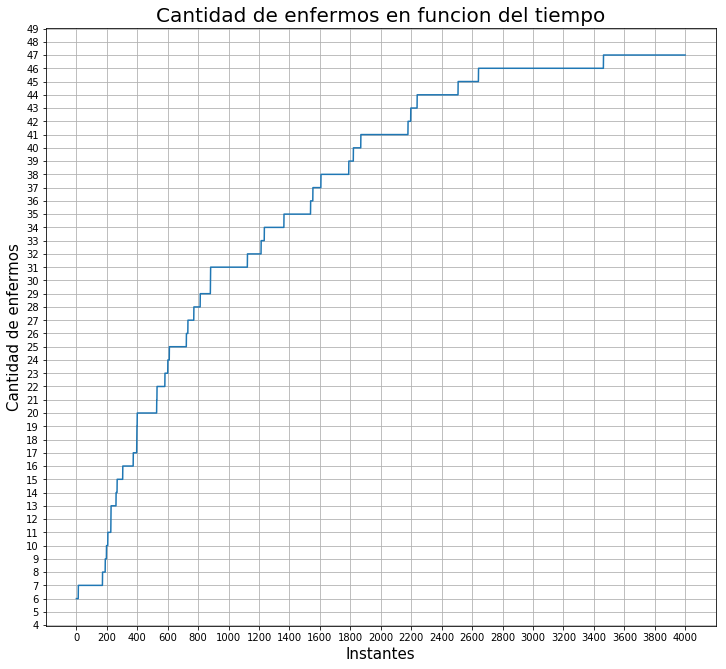

In [86]:
plt.figure(figsize=(12,11))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 1))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante, enfermos)

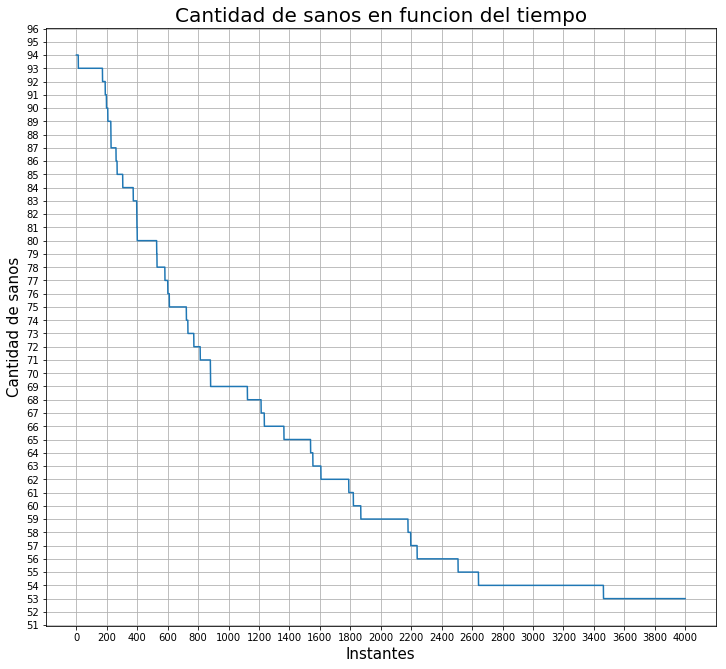

In [87]:
plt.figure(figsize=(12,11))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 1))
plt.subplot().grid()
plt.title('Cantidad de sanos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de sanos', fontsize = 15)
plt.plot(instante, sanos)

## 10.b) Cuando una persona se enferma, luego de 20 instantes tiene un 80% de probabilidad de curarse

- Se entiende que cuando una persona se cura es capaz de moverse.
- Si no consigue curarse, no vuelve a tener la oportunidad de hacerlo, ya que la función curar() se invoca luego de restarle 1 en cantidad de instantes que debe esperar hasta curarse, y esto sólo se hace cuando esa cantidad de instantes es mayor a cero.

In [65]:
def inicializarTiempoHastaCurarse(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 0):
            poblacion[i][5] = 0
        else:
            poblacion[i][5] = 20
    return poblacion

In [66]:
def curar(ciudadano):
    if rd.random() > 0.2:
        ciudadano[0] = 0
        ciudadano[3] = np.nan
    return ciudadano

In [67]:
def enfermarConPosibilidadDeCura(ciudadano):
    if rd.random() > 0.4:
        ciudadano[0] = 1
        ciudadano[5] = 20
    return ciudadano

In [68]:
def enfermarPoblacionConPosibilidadDeCura(poblacion, tamanio):
    for j in range(tamanio):
        for i in range(tamanio):
            if (cumplenDistancia(poblacion[j], poblacion[i]) == False and (j != i)):
                if (poblacion[j][0] != poblacion[i][0]):
                    if (poblacion[j][0] == 1):
                        poblacion[i] = enfermarConPosibilidadDeCura(poblacion[i])
                    elif (poblacion[i][0] == 1):
                        poblacion[j] = enfermarConPosibilidadDeCura(poblacion[j])
    setearCuentaRegresiva(poblacion, tamanio)

In [69]:
def desplazarConPosibilidadDeCura(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][4] == 1):
            poblacion[i][1] = desplazar_en_horizontal(poblacion[i][1])
            poblacion[i][2] = desplazar_en_vertical(poblacion[i][2])
            if (poblacion[i][0] == 1):
                poblacion[i][3] = poblacion[i][3] - 1
                if (poblacion[i][3] == 0):
                    poblacion[i][4] = 0
    enfermarPoblacionConPosibilidadDeCura(poblacion, tamanio)

In [70]:
def actualizarTiempoHastaCurarse(poblacion, tamanio):
    for i in range(tamanio):
        if (poblacion[i][0] == 1 and poblacion[i][5] > 0):
            poblacion[i][5] = poblacion[i][5] - 1
            if (poblacion[i][5] == 0):
                poblacion[i] = curar(poblacion[i])
    return poblacion

In [74]:
(enfermo, coor_h, coor_v, time_remaining, se_mueve, tiempo_hasta_curarse) = (np.ones(100),
                         np.random.uniform(0, 100, 100),
                         np.random.uniform(0, 100, 100),
                         np.zeros(100),
                         np.ones(100),
                         np.ones(100))
poblacion_b = np.asarray((enfermo, coor_h, coor_v, time_remaining, se_mueve, tiempo_hasta_curarse)).T
poblacion_b = inicializarEnfermos(poblacion_b, 100)
poblacion_b = inicializarCaminantes(poblacion_b, 100)
poblacion_b = inicializarTiempoHastaCurarse(poblacion_b, 100)

In [75]:
(instante_b, enfermos_b, sanos_b) = ([],[],[])
for i in range(4000):
    desplazarConPosibilidadDeCura(poblacion_b, 100)
    actualizarTiempoHastaCurarse(poblacion_b, 100)
    instante_b.insert(i, i)
    enfermos_b.insert(i, cantidadDeEnfermos(poblacion_b, 100))
    sanos_b.insert(i, cantidadDeSanos(poblacion_b, 100))

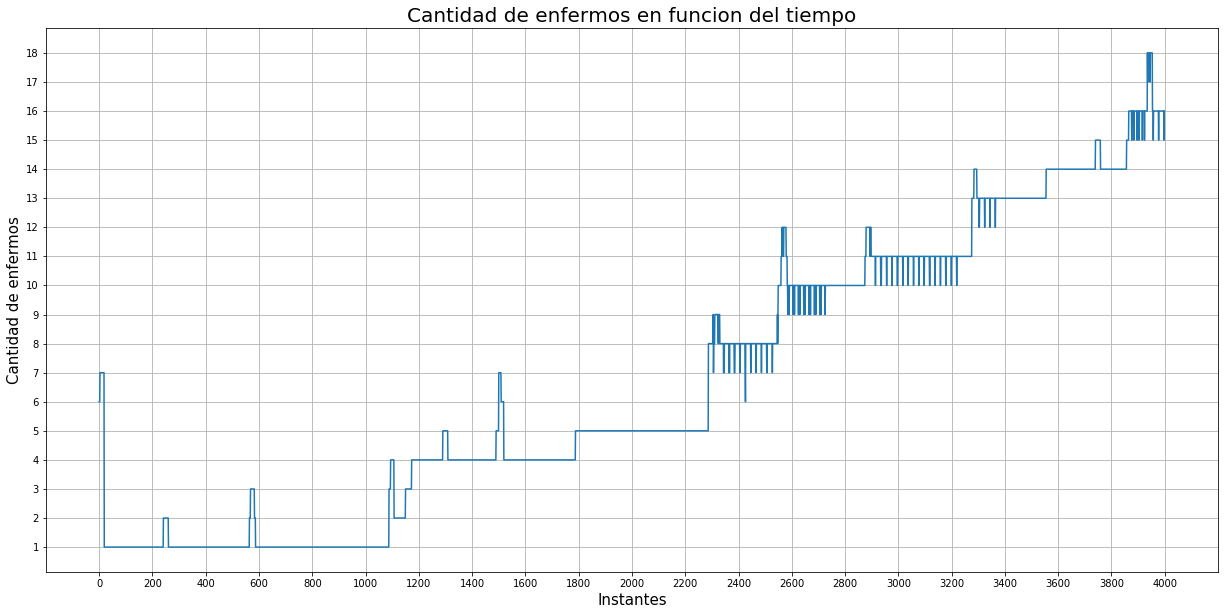

In [90]:
plt.figure(figsize=(21,10))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 1))
plt.subplot().grid()
plt.title('Cantidad de enfermos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de enfermos', fontsize = 15)
plt.plot(instante_b, enfermos_b)

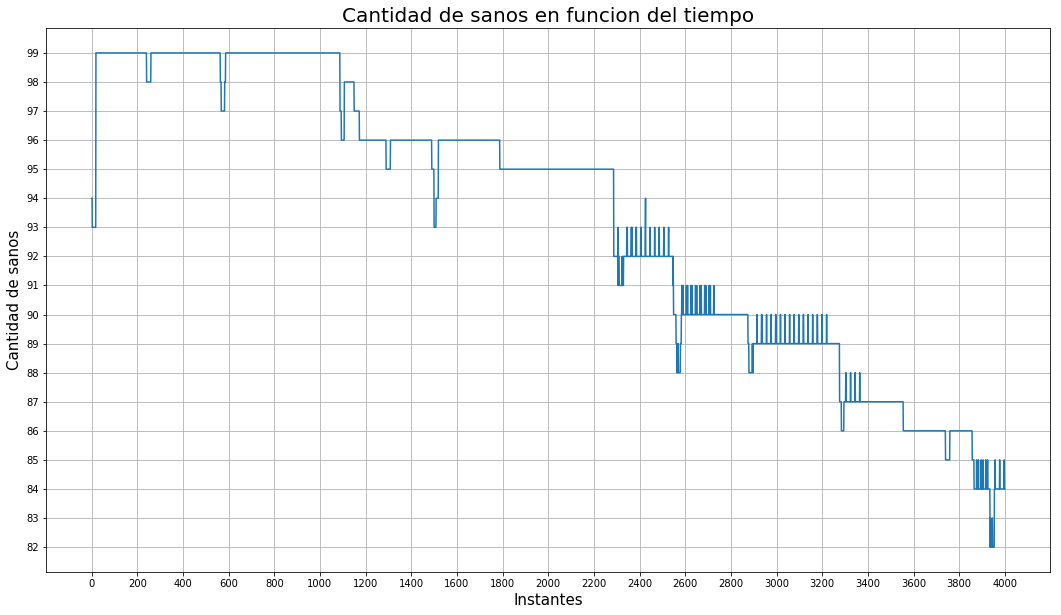

In [81]:
plt.figure(figsize=(18,10))
plt.xticks(np.arange(0, 4200, step = 200))
plt.yticks(np.arange(0, 100, step = 1))
plt.subplot().grid()
plt.title('Cantidad de sanos en funcion del tiempo', fontsize = 20)
plt.xlabel('Instantes', fontsize = 15)
plt.ylabel('Cantidad de sanos', fontsize = 15)
plt.plot(instante_b, sanos_b)